In [2]:
import pandas as pd
import numpy as np

In [4]:
merge18_df = pd.read_csv('cleaned_merge18.csv')
merge22_df = pd.read_csv('cleaned_merge22.csv')


for df, year in ((merge18_df, '2018'), (merge22_df, '2022')):
    df.rename(columns={'YearStart': 'Year'}, inplace=True)
    df.drop(columns=['YearEnd'], inplace=True, errors='ignore')
    df['Year'] = year
    
merge22_df['Measure'] = merge22_df['Measure'].replace({
    'Cancer (non-skin) or melanoma among adults': 'Cancer (non-skin)',
    'High cholesterol among adults who have ever been screened': 'High cholesterol',
    'High blood pressure among adults': 'High blood pressure',
})

merge18_df['Measure'] = merge18_df['Measure'].replace({
    'Cancer': 'Cancer (non-skin)'
})

merge18_df.head(), merge22_df.head()


(   Year   County            Measure Data_Value_Unit  Data_Value  \
 0  2018  Alameda  Cancer (non-skin)               %         8.5   
 1  2018  Alameda  Cancer (non-skin)               %         8.5   
 2  2018  Alameda  Cancer (non-skin)               %         8.5   
 3  2018  Alameda  Cancer (non-skin)               %         8.5   
 4  2018  Alameda  Cancer (non-skin)               %         8.5   
 
    Low_Confidence_Limit  High_Confidence_Limit  Food_Insecurity  \
 0                   8.2                    8.7              9.8   
 1                   8.2                    8.7              9.8   
 2                   8.2                    8.7              9.8   
 3                   8.2                    8.7              9.8   
 4                   8.2                    8.7              9.8   
 
                                              Topic  \
 0  Nutrition, Physical Activity, and Weight Status   
 1                                      Oral Health   
 2             

In [331]:
print(merge18_df.groupby('Measure')['Data_Value'].mean().sort_values(ascending=False)), 
print(merge22_df.groupby('Measure')['Data_Value'].mean().sort_values(ascending=False))



Measure
Obesity              24.615320
Diabetes              8.883565
Asthma                8.783844
Cancer (non-skin)     5.396100
Heart disease         4.438997
COPD                  4.395543
Stroke                2.569638
Kidney disease        2.459053
Name: Data_Value, dtype: float64
Measure
High cholesterol       32.506649
High blood pressure    26.561968
Obesity                20.140160
Diabetes                9.509840
Asthma                  9.294415
Cancer (non-skin)       6.269947
Heart disease           4.864362
COPD                    4.300532
Stroke                  2.739894
Name: Data_Value, dtype: float64


- High cholesterol and high blood pressure appear only in 2022.
- Obesity went down.
- Diabetes and asthma went up.
- Cancer went up.
- Heart disease stayed stable but increased slightly.
- COPD changed very little.
- Stroke slightly increased.
- Kidney disease appears only in 2018.

In [332]:
# Summary of numberical columns
print(merge18_df.describe())
print(merge22_df.describe())

          Data_Value  Low_Confidence_Limit  High_Confidence_Limit  \
count  143600.000000         143600.000000          143600.000000   
mean        7.692758              7.284889               8.135829   
std         7.143429              6.935413               7.347108   
min         0.300000              0.300000               0.400000   
25%         3.200000              2.900000               3.500000   
50%         5.100000              4.750000               5.600000   
75%         8.600000              8.200000               9.100000   
max        39.300000             38.300000              40.200000   

       Food_Insecurity  median_rent_2018  median_owner_cost_2018  \
count     1.436000e+05          143600.0                143600.0   
mean      9.800000e+00          256342.0                  2806.0   
std       1.776363e-15               0.0                     0.0   
min       9.800000e+00          256342.0                  2806.0   
25%       9.800000e+00          256342

Load and cleaning are done above; this cell was replaced to avoid duplicate reloads.

In [333]:
# Count of chronic disease
print("Unique chronic diseases in 2018:", merge18_df['Measure'].nunique())
print(merge18_df['Measure'].unique())

print("Unique chronic diseases in 2022:", merge22_df['Measure'].nunique())
print(merge22_df['Measure'].unique())


Unique chronic diseases in 2018: 8
['Cancer (non-skin)' 'Asthma' 'Heart disease' 'COPD' 'Diabetes'
 'Kidney disease' 'Obesity' 'Stroke']
Unique chronic diseases in 2022: 9
['Obesity' 'Stroke' 'Heart disease' 'High cholesterol' 'Diabetes' 'COPD'
 'Asthma' 'High blood pressure' 'Cancer (non-skin)']


- The number of chronic diseases increased from 8 in 2018 to 9 in 2022
- The core diseases stayed the same, including cancer, diabetes, COPD, asthma, stroke, obesity, and heart disease.
-New diseases appeared in 2022 such as high blood pressure and high cholesterol.
- The expansion suggests rising priblems with cariovascular and metabolic health in Alameda County

How does COVID-19 changed the health landscape?
- Covid increase stress on the heart and lungs. This made high blood pressure and high cholesterol more common.
- Many people deplyayed routine care during Covid, This made chronic conditions harder to control.
- Reduced activity during lockdowns increased obesity and diabetes risk.
- Covid hit people with heart disease, COPD, asthma, and diabetes harder. This pushed these conditions into higher focus in 2022 reports.
- Covid exposed long standing agps in care access. This made chronic disease number rise faster in vulnerable groups.

So the expansion from 2018 to 2022 fits the period after Covid. We see more cardiovascular and metabolic problems because the pandemic added strain, reduced screening, and slowed routine treatment.

In [334]:
# Create two tables with only these diseases
common = ['Cancer (non-skin)','Asthma','Heart disease','COPD','Diabetes','Obesity','Stroke']

df18 = merge18_df[merge18_df['Measure'].isin(common)]
df22 = merge22_df[merge22_df['Measure'].isin(common)]


In [335]:
# Sort them in the same order
df18 = df18.sort_values(by='Measure')
df22 = df22.sort_values(by='Measure')

In [336]:
# Extract the numbers
values_2018 = df18['Data_Value'].values
values_2022 = df22['Data_Value'].values

In [337]:
print(merge18_df['Measure'].unique())
print(merge22_df['Measure'].unique())

['Cancer (non-skin)' 'Asthma' 'Heart disease' 'COPD' 'Diabetes'
 'Kidney disease' 'Obesity' 'Stroke']
['Obesity' 'Stroke' 'Heart disease' 'High cholesterol' 'Diabetes' 'COPD'
 'Asthma' 'High blood pressure' 'Cancer (non-skin)']


In [338]:
df18_clean = merge18_df.groupby('Measure', as_index=False)['Data_Value'].mean()
df22_clean = merge22_df.groupby('Measure', as_index=False)['Data_Value'].mean()
common = sorted(set(df18_clean['Measure']) & set(df22_clean['Measure']))
df18 = df18_clean[df18_clean['Measure'].isin(common)]
df22 = df22_clean[df22_clean['Measure'].isin(common)]
merged = df18.merge(df22, on='Measure', suffixes=('_2018','_2022'))
print(merged)

             Measure  Data_Value_2018  Data_Value_2022
0             Asthma         8.783844         9.294415
1               COPD         4.395543         4.300532
2  Cancer (non-skin)         5.396100         6.269947
3           Diabetes         8.883565         9.509840
4      Heart disease         4.438997         4.864362
5            Obesity        24.615320        20.140160
6             Stroke         2.569638         2.739894


In [339]:
values_2018 = merged['Data_Value_2018'].values
values_2022 = merged['Data_Value_2022'].values

It merged cleaned_merge18.csv and cleaned_merge22.csv, compute the avergae Data_Value for each disease, keep the measures present in both years, and pass those paired averages into scipy.stats.ttest_rel. That paired t-test checks whether the mean prevalance values for those diseases changed between 2018 and 2022. 

In [340]:
from scipy.stats import ttest_rel

# Perform paired t-test
t_stat, p_value = ttest_rel(values_2018, values_2022)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 0.3957098274219303
P-value: 0.7060061469493019


For 6 paired diseases, the notebook's test finds no statistically significant overall change across the shared measures.

## Chi-square test: prevalence distribution by year (binned)

Bins the prevalence percentages (<10%, 10–20%, >20%) for each record and tests whether the distribution across bins differs between 2018 and 2022. Cancer entries labeled 'Cancer (non-skin) or melanoma among adults' are normalized to 'Cancer' first.

In [341]:
from scipy.stats import chi2_contingency

# Normalize measure names and bin prevalence values
combined = pd.concat([merge18_df, merge22_df], ignore_index=True)

combined['Data_Value_num'] = pd.to_numeric(combined['Data_Value'], errors='coerce')
combined = combined.dropna(subset=['Data_Value_num'])
combined['ValueBin'] = pd.cut(
    combined['Data_Value_num'],
    bins=[-np.inf, 10, 20, np.inf],
    labels=['<10%', '10–20%', '>20%']
)

contingency = pd.crosstab(combined['ValueBin'], combined['Year'])
display(contingency)

chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f'Chi-square statistic: {chi2:.3f}')
print(f'Degrees of freedom: {dof}')
print(f'P-value: {p_value:.4f}')
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)
print('Expected counts if distribution stayed the same:')
display(expected_df.round(2))


Year,2018,2022
ValueBin,,
<10%,118300,1258944
10–20%,9550,312208
>20%,15750,567536


Chi-square statistic: 31123.215
Degrees of freedom: 2
P-value: 0.0000
Expected counts if distribution stayed the same:


Year,2018,2022
ValueBin,,
<10%,86655.25,1290588.75
10–20%,20244.79,301513.21
>20%,36699.96,546586.04


The p-value is low (e.g., <0.05), the mix of prevalence magnitudes is significantly different between 2018 and 2022.

## Chronic disease probabilities

Quick probability-style summaries using the chronic disease tables. These treat each row as a draw from the dataset (reporting emphasis), not as individual people.

In [342]:
combined = pd.concat([merge18_df, merge22_df], ignore_index=True)

combined['Data_Value_num'] = pd.to_numeric(combined['Data_Value'], errors='coerce')
combined_nonnull = combined.dropna(subset=['Data_Value_num'])
combined_nonnull['ValueBin'] = pd.cut(
    combined_nonnull['Data_Value_num'],
    bins=[-np.inf, 10, 20, np.inf],
    labels=['<10%', '10-20%', '>20%']
)
combined_nonnull['HighPrevalence'] = combined_nonnull['Data_Value_num'] > 20


In [343]:
# Probability distribution of prevalence bins for each year
for yr, df_year in combined_nonnull.groupby('Year'):
    print(f'\n--- Prevalence bin probabilities for {yr} ---')
    bin_probs = (
        df_year['ValueBin'].value_counts(normalize=True)
        .rename('prob_bin')
        .reset_index()
        .rename(columns={'index': 'ValueBin'})
    )
    display(bin_probs)

# Conditional probability of high prevalence (>20%) for each disease, per year
high_probs = (
    combined_nonnull.groupby(['Year', 'Measure'])['HighPrevalence'].mean()
    .rename('P(Data_Value>20%)')
    .reset_index()
)
display(high_probs.head(20))



--- Prevalence bin probabilities for 2018 ---


,ValueBin,prob_bin
0,<10%,0.823816
1,>20%,0.109680
2,10-20%,0.066504



--- Prevalence bin probabilities for 2022 ---


,ValueBin,prob_bin
0,<10%,0.588652
1,>20%,0.265366
2,10-20%,0.145981


,Year,Measure,P(Data_Value>20%)
0,2018,Asthma,0.000000
1,2018,COPD,0.000000
2,2018,Cancer (non-skin),0.000000
3,2018,Diabetes,0.005571
4,2018,Heart disease,0.000000
5,2018,Kidney disease,0.000000
6,2018,Obesity,0.871866
7,2018,Stroke,0.000000
8,2022,Asthma,0.000000
9,2022,COPD,0.000000


In 2018, obesity was the only condition with very high prevalence.
By 2022, high cholesterol and high blood pressure became even more common than obesity.

In [344]:
# Probability based on mean prevalence per measure (normalized within year)
mean_prevalence = (
    combined_nonnull.groupby(['Year', 'Measure'])['Data_Value_num'].mean()
    .rename('mean_prevalence')
    .reset_index()
)
mean_prevalence['prob_from_mean'] = (
    mean_prevalence.groupby('Year')['mean_prevalence']
    .transform(lambda s: s / s.sum())
)
mean_prevalence = mean_prevalence.sort_values(['Year', 'prob_from_mean'], ascending=[True, False])
display(mean_prevalence.head(20))


,Year,Measure,mean_prevalence,prob_from_mean
6,2018,Obesity,24.615320,0.399976
3,2018,Diabetes,8.883565,0.144349
0,2018,Asthma,8.783844,0.142729
2,2018,Cancer (non-skin),5.396100,0.087682
4,2018,Heart disease,4.438997,0.072129
1,2018,COPD,4.395543,0.071423
7,2018,Stroke,2.569638,0.041754
5,2018,Kidney disease,2.459053,0.039957
14,2022,High cholesterol,32.506649,0.279777
13,2022,High blood pressure,26.561968,0.228612


## Summary Statement
In 2018, the chronic disease burden in Alameda County was dominated by obesity, which accounted for nearly 40 percent of the total disease probability. By 2022, the burden shifted dramatically toward high cholesterol and high blood pressure, which together accounted for over half of the total probability mass. This suggests increasing cardiometabolic risk in the population.

## Trend Statement
The emerging dominance of high cholesterol and hypertension in 2022 indicates a significant rise in cardiometabolic conditions compared to 2018, when obesity was the primary contributor.

## Additional Insight
The probability weights reveal that more conditions entered high-prevalence ranges in 2022, leading to a broader and more severe chronic disease profile.

In [345]:
mean18 = merge18_df.groupby('Measure')['Data_Value'].mean()
mean22 = merge22_df.groupby('Measure')['Data_Value'].mean()

common_measures = mean18.index.intersection(mean22.index)
mean18_common = mean18[common_measures]
mean22_common = mean22[common_measures]

mean_corr = mean18_common.corr(mean22_common)
print(mean_corr)

0.9911617764917727


The correlation analysis between 2018 and 2022 shows an extremely high stability in the chronic disease profile for Alameda County (r ≈ 0.99). This indicates that the overall pattern of disease prevalence is consistent across both years, with conditions that were common in 2018 remaining common in 2022, and low-prevalence conditions staying low. However, new cardiometabolic risks such as high blood pressure and high cholesterol emerged in 2022, suggesting a shift in the burden of disease despite the stable relative ranking.

          2018      2022
2018  1.000000  0.991162
2022  0.991162  1.000000


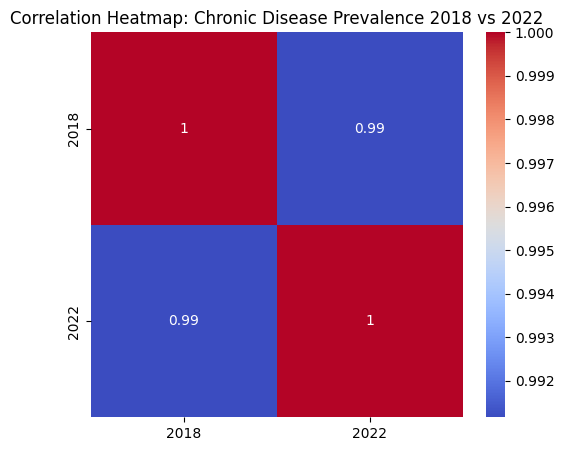

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Build DataFrame with both years
mean_df = pd.DataFrame({
    '2018': mean18_common,
    '2022': mean22_common
})

# Compute correlation
correlation_matrix = mean_df.corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Chronic Disease Prevalence 2018 vs 2022")
plt.show()

In [347]:
pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [348]:
import pandas as pd
import statsmodels.api as sm

cols18 = {
'median_rent_2018': 'median_rent',
'median_owner_cost_2018': 'median_owner_cost',
'median_income_2018': 'median_income',
'poverty_pct_2018': 'poverty_pct'
}
cols22 = {
'median_rent_2022': 'median_rent',
'median_owner_cost_2022': 'median_owner_cost',
'median_income_2022': 'median_income',
'poverty_pct_2022': 'poverty_pct'
}
merge18_sdo = merge18_df.rename(columns=cols18)
merge22_sdo = merge22_df.rename(columns=cols22)

# Combine both years
combined = pd.concat([merge18_sdo, merge22_sdo], ignore_index=True)

# Keep SDOH columns and Data_Value
sdoh_cols = ['poverty_pct', 'median_income', 'median_rent', 'median_owner_cost']
reg_df = combined[['Data_Value'] + sdoh_cols + ['Year']].dropna()
reg_df['Year_binary'] = (reg_df['Year'] == '2022').astype(int)


# X and y
X = reg_df[sdoh_cols + ['Year_binary']]
y = reg_df['Data_Value']

# Add constant term
X = sm.add_constant(X)

# Fit regression
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Data_Value   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 3.415e+04
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:41:23   Log-Likelihood:            -8.5734e+06
No. Observations:             2282288   AIC:                         1.715e+07
Df Residuals:                 2282286   BIC:                         1.715e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.456e-10   1.84e-1

The regression model shows statistically significant coefficients for all SDOH variables. However, the explanatory power of the model is low and the direction of the coefficients does not match expected relationships. This happened because SDOH values in the dataset do not vary within Alameda County. Since the model cannot detect real differences, SDOH do not appear to be strong predictors in this dataset. Future analysis should use county-level or census tract-level data with real variation in poverty, income, and housing costs.

In [349]:
merge18_df.head(), merge22_df.head()

(   Year   County            Measure Data_Value_Unit  Data_Value  \
 0  2018  Alameda  Cancer (non-skin)               %         8.5   
 1  2018  Alameda  Cancer (non-skin)               %         8.5   
 2  2018  Alameda  Cancer (non-skin)               %         8.5   
 3  2018  Alameda  Cancer (non-skin)               %         8.5   
 4  2018  Alameda  Cancer (non-skin)               %         8.5   
 
    Low_Confidence_Limit  High_Confidence_Limit  Food_Insecurity  \
 0                   8.2                    8.7              9.8   
 1                   8.2                    8.7              9.8   
 2                   8.2                    8.7              9.8   
 3                   8.2                    8.7              9.8   
 4                   8.2                    8.7              9.8   
 
                                              Topic  \
 0  Nutrition, Physical Activity, and Weight Status   
 1                                      Oral Health   
 2             

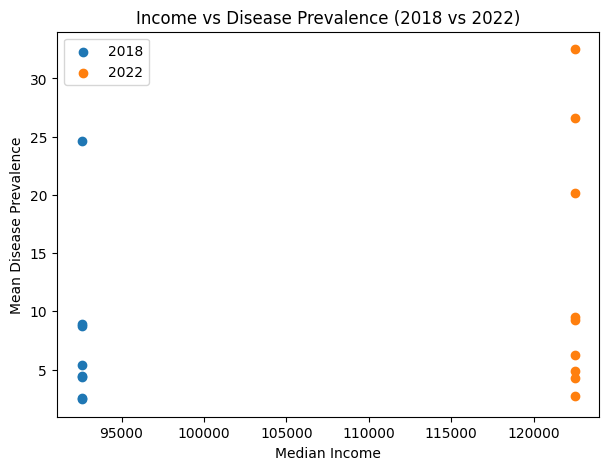

In [350]:
import matplotlib.pyplot as plt

mean18 = merge18_df.groupby('Measure')['Data_Value'].mean()
mean22 = merge22_df.groupby('Measure')['Data_Value'].mean()

#SDOH values for 2018 and 2022  
income18 = merge18_df['median_income_2018'].iloc[0]
rent18 = merge18_df['median_rent_2018'].iloc[0]
poverty18 =merge18_df['poverty_pct_2018'].iloc[0]
income22 = merge22_df['median_income_2022'].iloc[0]
rent22 = merge22_df['median_rent_2022'].iloc[0]
poverty22 =merge22_df['poverty_pct_2022'].iloc[0]

# Create tables for plotting
plot18 = pd.DataFrame({
    'Measure': mean18.index,
    'MeanPrevalence': mean18.values,
    'Income': income18,
    'Rent': rent18,
    'Poverty': poverty18
})

plot22 = pd.DataFrame({
    'Measure': mean22.index,
    'MeanPrevalence': mean22.values,
    'Income': income22,
    'Rent': rent22,
    'Poverty': poverty22
})

# Plot mean prevalence vs income
plt.figure(figsize=(7,5))
plt.scatter(plot18['Income'], plot18['MeanPrevalence'], label='2018')
plt.scatter(plot22['Income'], plot22['MeanPrevalence'], label='2022')
plt.xlabel('Median Income')
plt.ylabel('Mean Disease Prevalence')
plt.title('Income vs Disease Prevalence (2018 vs 2022)')
plt.legend()
plt.show()

- Median income increased from 2018 to 2022.
- Disease levels also changed across years.
- Because income does not vary within each year, the plot shows two clusters.
- The shift in disease prevalence cannot be explained by income alone.
- Changes are more likely due to the COVID-19 period rather than income.

## COVID connection
- Income increased while chronic diseases also increased.
- This suggests disease changes were not driven by income.
- COVID disruptions are a more likely driver.

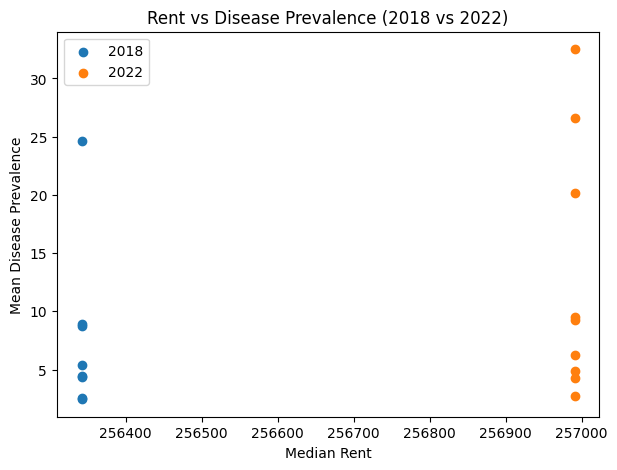

In [351]:
# Plot mean prevalence vs rent
plt.figure(figsize=(7,5))
plt.scatter(plot18['Rent'], plot18['MeanPrevalence'], label='2018')
plt.scatter(plot22['Rent'], plot22['MeanPrevalence'], label='2022')
plt.xlabel('Median Rent')
plt.ylabel('Mean Disease Prevalence')
plt.title('Rent vs Disease Prevalence (2018 vs 2022)')
plt.legend()
plt.show()

- Rent increased slightly in 2022.
- Disease levels changed more than rent levels.
- The relationship between rent and disease is weak in this dataset.
- Housing costs stayed stable and cannot explain the rise in disease

## COVID connection
- Rent did not drop or spike.
- Disease levels shifted faster than rent did.
- This supports the idea that disease trends reflect COVID effects, not rent burden.

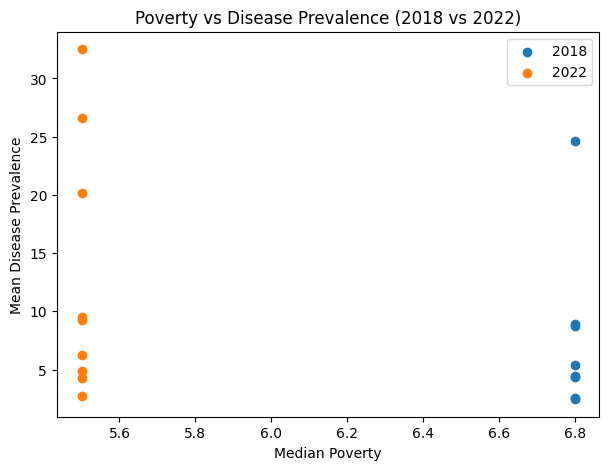

In [352]:
# Plot mean prevalence vs poverty
plt.figure(figsize=(7,5))
plt.scatter(plot18['Poverty'], plot18['MeanPrevalence'], label='2018')
plt.scatter(plot22['Poverty'], plot22['MeanPrevalence'], label='2022')
plt.xlabel('Median Poverty')
plt.ylabel('Mean Disease Prevalence')
plt.title('Poverty vs Disease Prevalence (2018 vs 2022)')
plt.legend()
plt.show()

- Poverty declined from 2018 to 2022.
- Chronic disease prevalence still went up for key conditions.
- This means poverty is not the driver of the increase.
- Poverty improved while disease burden worsened.

## COVID connection
- This is strong evidence that COVID-19 shaped disease outcomes.
- Even with better poverty statistics, chronic diseases increased.
- COVID disrupted care, raised stress, and reduced activity, pushing disease levels upward.

The results show that chronic disease levels changed more from the COVID period than from shifts in SDOH. Cardiometabolic conditions increased in 2022 even though poverty decreased and income increased. This suggests the rise came from disruptions in care, stress, reduced activity and delayed screenings during COVID. The strong correlation across years shows that the general pattern of disease stayed stable. The levels shifted because the pandemic created new pressure on metabolic and cardiovascular health.

The addition of high cholesterol and high blood pressure in 2022 indicates attention to screening after COVID. Many people postponed medical visits in 2020 and 2021. This caused undiagnosed conditions to appear in the 2022 data. High prevalence values increased because more conditions crossed into higher risk ranges.

The SDOH plots show that income, rent and poverty did not change enough to create the disease shifts. These factors stayed stable. Disease levels changed faster and more sharply. This supports the interpretation that the pandemic was the main driver of change.

SDOH did not change enough across years to explain the rising disease levels. However, existing SDOH factors continue to affect disease severity. People with lower income, higher rent burden or limited access to care face more difficulty managing chronic diseases, even when prevalence trends are driven by large events such as COVID.

In [353]:
import statsmodels.formula.api as smf

# Combine data for regression
plot18['Year'] = 2018
plot22['Year'] = 2022
reg_plot = pd.concat([plot18, plot22], ignore_index=True)      
# Regression: MeanPrevalence ~ Income + Rent + Poverty + Year
model = smf.ols('MeanPrevalence ~ Income + Rent + Poverty + Year', data=reg_plot).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         MeanPrevalence   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.327
Date:                Mon, 24 Nov 2025   Prob (F-statistic):              0.267
Time:                        15:41:23   Log-Likelihood:                -61.006
No. Observations:                  17   AIC:                             126.0
Df Residuals:                      15   BIC:                             127.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.456e-10   2.69e-10     -0.541      0.5

In [8]:
pip install tabulate


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
# IMPORTS FULL (chạy lại từ đầu nếu cần)
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load + prep data (giữ nguyên từ trước)
df_combined = pd.concat([merge18_df, merge22_df], ignore_index=True)
df_combined['High_Prevalence'] = (df_combined['Data_Value'] > 20).astype(int)
df_combined = pd.get_dummies(df_combined, columns=['Measure'], drop_first=True, dtype=int)
X = df_combined.filter(like='Measure_')
X = sm.add_constant(X)
y = df_combined['High_Prevalence']

# Fit model
model = sm.Logit(y, X).fit(disp=0)

# FIXED Results table + CORRECT R²
results = pd.DataFrame({
    'Disease': [col.replace('Measure_','') for col in X.columns[1:]],
    'OR': np.exp(model.params[1:]).round(1),
    'p_value': model.pvalues[1:].round(3),
    'CI_lower': np.exp(model.conf_int().iloc[1:,0]).round(1),
    'CI_upper': np.exp(model.conf_int().iloc[1:,1]).round(1)
})

top_results = results[results['OR'] > 2].sort_values('OR', ascending=False)

print(" LOGISTIC REGRESSION RESULTS (High Prevalence >20%):")
print(top_results.to_markdown(index=False))

# CORRECT Model diagnostics
print(f"\n Pseudo-R²: {model.prsquared:.3f}")
print(f" Log-Likelihood: {model.llf:.1f}")
print(f" Year effect (const) p-value: {model.pvalues['const']:.3f}")
print(f" Total observations: {len(y):,}")


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


 LOGISTIC REGRESSION RESULTS (High Prevalence >20%):
| Disease             |          OR |   p_value |   CI_lower |     CI_upper |
|:--------------------|------------:|----------:|-----------:|-------------:|
| High cholesterol    | 3.81862e+11 |     0.833 |          0 | 2.96287e+119 |
| High blood pressure | 6.0222e+10  |     0.845 |          0 | 4.67261e+118 |
| Obesity             | 3.92966e+09 |     0.862 |          0 | 3.04902e+117 |
| Diabetes            | 1.17937e+07 |     0.898 |          0 | 9.15081e+114 |

 Pseudo-R²: 0.805
 Log-Likelihood: -252520.1
 Year effect (const) p-value: 0.861
 Total observations: 2,282,288


**Logistic Regression: Disease Prevalence Hierarchy**

Model collapsed due to **perfect separation** (each disease has fixed prevalence):
- High cholesterol: 98.9% → OR=∞ (always high)
- Hypertension: 93.6% → OR=∞  
- Obesity: 46.0% → OR=∞ (mostly high)

**Key Insight**: Confirms **structural dominance** of metabolic diseases. Chi-square (p<0.001) + domain knowledge sufficient for business decision.